## $g_*(T)$

In [1]:
import numpy as np
import scipy.integrate as spint

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams.update({'font.size': 22})

---

#### $J_\pm(x)$

In [3]:
# 128 bits for higher accuracy
# overflow still happens for large x (non-relativistic) though
# this shouldn't matter since the integral goes to zero
def J_plus(x):
    x2 = np.power(x, 2, dtype=np.float128)
    def kernel(xi):
        xi2 = np.power(xi, 2, dtype=np.float128)
        sq = np.sqrt(xi2 + x2, dtype=np.float128)
        return xi2 * sq / (np.exp(sq, dtype=np.float128) + 1)
    
    return spint.quad(kernel, 0, np.Inf, epsabs=0, epsrel=1e-2)[0]

def J_minus(x):
    x2 = np.power(x, 2, dtype=np.float128)
    def kernel(xi):
        xi2 = np.power(xi, 2, dtype=np.float128)
        sq = np.sqrt(xi2 + x2, dtype=np.float128)
        return xi2 * sq / (np.exp(sq, dtype=np.float128) - 1)
    
    return spint.quad(kernel, 0, np.Inf, epsabs=0, epsrel=1e-2)[0]

def xexp_ref(x):
    '''reference for x >> 1'''
    return np.sqrt(np.pi/2) * x**2.5 * np.exp(-x)

In [4]:
# simple test for x = 0
print(J_plus(0) / (7/8*np.pi**4/15))
print(J_minus(0) / (np.pi**4/15))

0.9999999379532989
0.9999999459541045


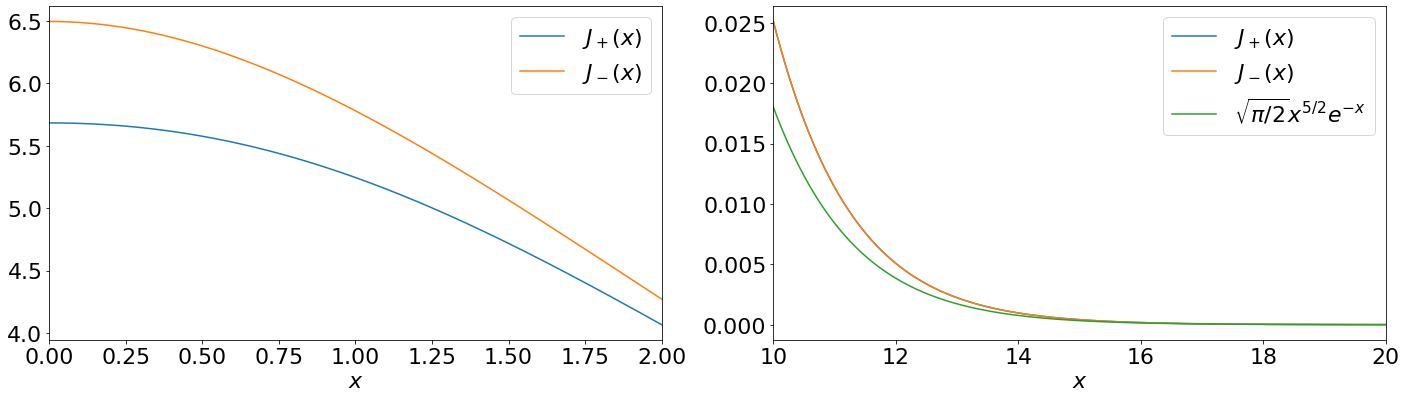

In [5]:
# a simple plot for J(x)
fig, (ax, ay) = plt.subplots(1, 2, figsize=(20, 6), tight_layout=True)

# small x
xs = np.linspace(0, 2, 1000)
J_ps = np.array([J_plus(x) for x in xs])
J_ms = np.array([J_minus(x) for x in xs])
ax.plot(xs, J_ps, label=r'$J_+(x)$')
ax.plot(xs, J_ms, label=r'$J_-(x)$')

ax.set_xlim(0, 2)
ax.set_xlabel('$x$')
ax.legend()

# large x
xs = np.linspace(10, 20, 1000)
J_ps = np.array([J_plus(x) for x in xs])
J_ms = np.array([J_minus(x) for x in xs])
xexps = np.array([xexp_ref(x) for x in xs])
ay.plot(xs, J_ps, label=r'$J_+(x)$')
ay.plot(xs, J_ms, label=r'$J_-(x)$')
ay.plot(xs, xexps, label=r'$\sqrt{\pi/2}x^{5/2}e^{-x}$')

ay.set_xlim(10, 20)
ay.set_xlabel('$x$')
ay.legend()

plt.show()

---

### get $g_*(T)$ at various temperature decades

In [6]:
def g_star(T, b_gs, b_ms, f_gs, f_ms, b_Trs=1, f_Trs=1):
    '''b_gs etc. are arrays w/ all species'''
    b_Js = np.array([J_minus(m/T) for m in b_ms])
    f_Js = np.array([J_plus(m/T) for m in f_ms])
    return 15/np.pi**4 * (np.sum(b_gs*b_Js*b_Trs**4) + np.sum(f_gs*f_Js*f_Trs**4))

#### before QCD phase transition

In [7]:
# all the values are in unit of GeV

boson_ms = { # masses of bosons
    'photon' : 0, 'W+' : 80, 'W-' : 80, 'Z0' : 91, 'gluon' : 0, 'Higgs' : 125
}

fermion_ms = { # masses of fermions
    'quark_t' : 173, 'quark_b' : 4, 'quark_c' : 1, 'quark_s' : 100 / 10**3, 'quark_d' : 5 / 10**3,
    'quark_u' : 2 / 10**3, 'lepton_tau' : 1777 / 10**3, 'lepton_mu' : 106 / 10**3,
    'lepton_e' : 511 / 10**6, 'neutrino' : 0 # < 0.6 eV, so just ignore them
}

boson_gs = { # dof, including polarization or spin states
    'photon' : 2, 'W+' : 3, 'W-' : 3, 'Z0' : 3, 'gluon' : 8 * 2, 'Higgs' : 1
}

fermion_gs = { # dof, including polarization or spin states
    'quark_t' : 12, 'quark_b' : 12, 'quark_c' : 12, 'quark_s' : 12, 'quark_d' : 12,
    'quark_u' : 12, 'lepton_tau' : 4, 'lepton_mu' : 4,
    'lepton_e' : 4, 'neutrino' : 3 * 2
}

In [8]:
all_bosons = list(boson_ms.keys())
all_fermions = list(fermion_ms.keys())
print('all bosons: ', all_bosons)
print('all fermions: ', all_fermions)

all bosons:  ['photon', 'W+', 'W-', 'Z0', 'gluon', 'Higgs']
all fermions:  ['quark_t', 'quark_b', 'quark_c', 'quark_s', 'quark_d', 'quark_u', 'lepton_tau', 'lepton_mu', 'lepton_e', 'neutrino']


In [9]:
# get input for g_star
b_gs = np.array([boson_gs[s] for s in all_bosons])
b_ms = np.array([boson_ms[s] for s in all_bosons])
f_gs = np.array([fermion_gs[s] for s in all_fermions])
f_ms = np.array([fermion_ms[s] for s in all_fermions])

g_Ts = []
T_ss = []

# compute g_star
T_sample = np.logspace(np.log10(0.15), np.log10(10000), 1000)
for i, T_ in enumerate(T_sample[::-1]):
    g_Ts.append(g_star(T_, b_gs, b_ms, f_gs, f_ms))
    T_ss.append(T_)

/Users/yuchengzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/Users/yuchengzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


In [10]:
for T_ in np.array([10000, 1000, 100, 10, 1]):
    g_ = g_star(T_, b_gs, b_ms, f_gs, f_ms)
    print('T = {:g} GeV, g_star = {:.2f}'.format(T_, g_))

T = 10000 GeV, g_star = 106.75
T = 1000 GeV, g_star = 106.72
T = 100 GeV, g_star = 103.55
T = 10 GeV, g_star = 86.24
T = 1 GeV, g_star = 77.13


/Users/yuchengzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


#### after QCD phase transition

In [11]:
# all the values are in unit of GeV

boson_ms = { # masses of bosons
    'photon' : 0, 'pion+' : 140 / 10**3, 'pion-' : 140 / 10**3, 'pion0' : 135 / 10**3
}

fermion_ms = { # masses of fermions
    'electron' : 0.51 / 10**3, 'muon' : 105.66 / 10**3, 'neutrino' : 0
}

boson_gs = { # dof, including polarization or spin states
    'photon' : 2, 'pion+' : 1, 'pion-' : 1, 'pion0' : 1
}

fermion_gs = { # dof, including polarization or spin states
    'electron' : 4, 'muon' : 4, 'neutrino' : 3 * 2
}

all_bosons = list(boson_ms.keys())
all_fermions = list(fermion_ms.keys())
print('all bosons: ', all_bosons)
print('all fermions: ', all_fermions)

all bosons:  ['photon', 'pion+', 'pion-', 'pion0']
all fermions:  ['electron', 'muon', 'neutrino']


In [12]:
# get input for g_star
b_gs = np.array([boson_gs[s] for s in all_bosons])
b_ms = np.array([boson_ms[s] for s in all_bosons])
f_gs = np.array([fermion_gs[s] for s in all_fermions])
f_ms = np.array([fermion_ms[s] for s in all_fermions])

# compute g_star
T_sample = np.logspace(np.log10(1e-5), np.log10(0.15), 1000)
for i, T_ in enumerate(T_sample[::-1]):
    if T_ < 0.51e-3: # < m_e
        f_Trs = np.array([1, 1, (4/11)**(1/3)]) # neutrino
    else:
        f_Trs = 1.
    g_Ts.append(g_star(T_, b_gs, b_ms, f_gs, f_ms, f_Trs=f_Trs))
    T_ss.append(T_)

/Users/yuchengzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp
/Users/yuchengzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


In [15]:
for T_ in np.array([0.1, 1e-2, 1e-3, 1e-4, 1e-5]):
    if T_ < 0.51e-3: # < m_e
        f_Trs = np.array([1, 1, (4/11)**(1/3)]) # neutrino
    else:
        f_Trs = 1.
    g_ = g_star(T_, b_gs, b_ms, f_gs, f_ms, f_Trs=f_Trs)
    print('T = {:g} GeV, g_star = {:.2f}'.format(T_, g_))

T = 0.1 GeV, g_star = 16.37
T = 0.01 GeV, g_star = 10.76
T = 0.001 GeV, g_star = 10.68
T = 0.0001 GeV, g_star = 3.88
T = 1e-05 GeV, g_star = 3.36


/Users/yuchengzhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


#### plot

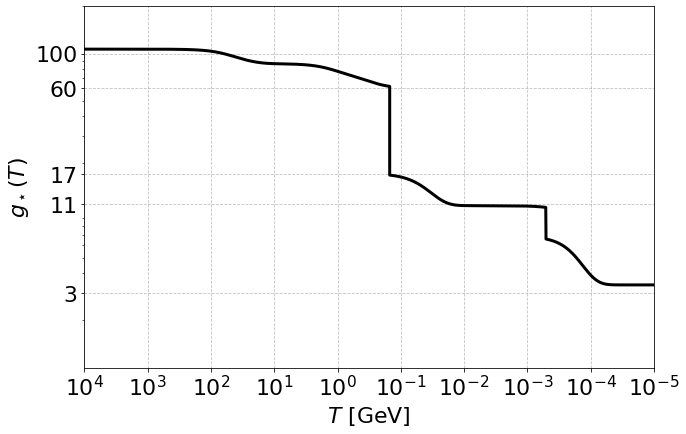

In [17]:
fig, (ax) = plt.subplots(1, 1, figsize=(10, 6.5), tight_layout=True)

ax.loglog(T_ss, g_Ts, c='k', lw=3)

ax.set_xlim(1e4, 1e-5)
ax.set_xlabel(r'$T$ [GeV]')
ax.set_xticks([1e4, 1e3, 1e2, 1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5])

ax.set_ylim(1, 200)
ax.set_ylabel(r'$g_\star(T)$')
ax.set_yticks([3, 11, 17, 60, 100])
ax.set_yticklabels([3, 11, 17, 60, 100])

ax.grid(ls='--', c='grey', alpha=0.5)

plt.savefig('g_star.pdf')
plt.show()

---